In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Categories=['NORMAL','PNEUMONIA']

In [ ]:
flat_data_arr=[]#input array
target_arr=[] #output array
datadirTrain='/content/drive/MyDrive/input/chest-xray-pneumonia/chest_xray/train'
datadirTest='/content/drive/MyDrive//input/chest-xray-pneumonia/chest_xray/test'

In [ ]:
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadirTrain,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(100,100,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df


loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,Target
0,0.174060,0.174060,0.174060,0.183765,0.183765,0.183765,0.156863,0.156863,0.156863,0.153961,...,0.145098,0.145098,0.145098,0.150841,0.150841,0.150841,0.155707,0.155707,0.155707,0
1,0.375686,0.375686,0.375686,0.372549,0.372549,0.372549,0.436078,0.436078,0.436078,0.562745,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.015686,0.015686,0.015686,0.010431,0.010431,0.010431,0.002588,0.002588,0.002588,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,0.012667,0.012667,0.012667,0.078627,0.078627,0.078627,0.156353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025843,0.025843,0.025843,0
4,0.354137,0.354137,0.354137,0.419608,0.419608,0.419608,0.385471,0.385471,0.385471,0.372782,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,0.127451,0.127451,0.127451,0.153137,0.153137,0.153137,0.194118,0.194118,0.194118,0.249216,...,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,1
5212,0.556863,0.556863,0.556863,0.530003,0.530003,0.530003,0.413341,0.413341,0.413341,0.325490,...,0.187843,0.187843,0.187843,0.085255,0.085255,0.085255,0.027451,0.027451,0.027451,1
5213,0.380435,0.380435,0.380435,0.394196,0.394196,0.394196,0.431765,0.431765,0.431765,0.435059,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5214,0.210902,0.210902,0.210902,0.320428,0.320428,0.320428,0.288000,0.288000,0.288000,0.266060,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [ ]:
df.shape

(5216, 30001)

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=77,stratify=y)
print('Splitted Successfully')
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

Splitted Successfully
(3651, 30000) (1565, 30000) (3651,) (1565,)


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import svm
# param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
# svc=svm.SVC(probability=True)
# print("The training of the model is started, please wait for while as it may take few minutes to complete")
# model=GridSearchCV(svc,param_grid)
# model.fit(x_train,y_train)
# print('The Model is trained well with the given images')
# model.best_params_

In [ ]:
from sklearn.svm import SVC
clf_SVM=SVC(C=10,kernel='rbf')
clf_SVM.fit(x_train,y_train)

SVC(C=10)

In [ ]:
y_pred=clf_SVM.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 95.33546325878595% accurate


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       402
           1       0.97      0.98      0.98      1163

    accuracy                           0.96      1565
   macro avg       0.96      0.94      0.95      1565
weighted avg       0.96      0.96      0.96      1565



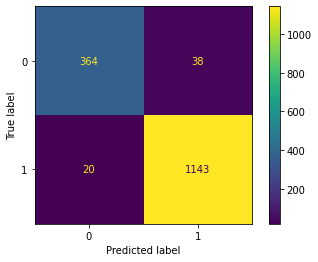

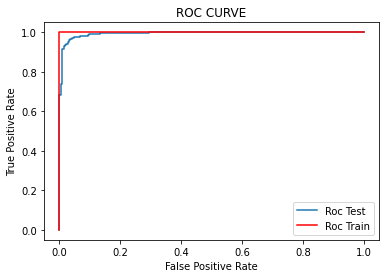

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
print (classification_report(y_test,clf_SVM.predict(x_test)))
plot_confusion_matrix(clf_SVM,x_test,y_test)
fig=plot_roc_curve(clf_SVM,x_test,y_test,label="Roc Test")
fig=plot_roc_curve(clf_SVM,x_train,y_train,color='r',label="Roc Train",ax = fig.ax_)
plt.title("ROC CURVE")
plt.show()

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=77,stratify=y)
print('Pemisahan Data/Test')
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
scaler = StandardScaler()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
x_train=x_train
x_test= x_test

In [ ]:
x_train

array([[-0.94144917,  0.77181084, -0.62192661, ..., -0.19760321,
         0.83756858, -0.08089891],
       [ 0.67173162,  2.6613797 , -0.03979065, ..., -0.89863564,
         0.696654  , -4.098803  ],
       [ 0.60421893,  0.88534383,  0.53349876, ...,  0.31938607,
         0.40865713,  0.57358975],
       ...,
       [ 0.29602062,  1.43018898,  0.56704068, ..., -0.40647   ,
         0.00998504, -0.08392908],
       [-2.81816575,  0.84986581,  1.34904742, ..., -0.73330605,
         1.16424074,  1.3166856 ],
       [ 0.50649828, -1.17023716, -0.65334857, ..., -0.38091208,
         0.55037215,  1.00951767]])

In [ ]:
x_test

array([[ 1.09177733,  1.37219936, -0.11576713, ...,  0.19223388,
         0.4613756 , -0.06358981],
       [-0.37469825, -0.25564662, -1.38957373, ...,  0.90767066,
         1.35575219,  1.06605532],
       [ 1.06302218, -0.72434595, -0.87419841, ..., -2.67973112,
         0.819122  , -1.18824369],
       ...,
       [-0.2376704 , -0.56363531,  1.06242728, ...,  0.37676716,
        -1.49586062, -1.46491341],
       [ 0.75770183, -0.10140869,  0.44519476, ...,  1.42099861,
        -1.39502954, -1.55687341],
       [ 1.70614806,  2.6376183 ,  1.79699834, ..., -0.70592481,
         0.43475063, -0.38018688]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.75, 0.1],
              'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(), param_grid)
grid.fit(x_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(x_train, y_train)

Best params: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


SVC(C=0.1, gamma=1, kernel='linear')

In [ ]:
from sklearn.svm import SVC
clf_SVM=SVC(C=10,kernel='rbf')
clf_SVM.fit(x_train,y_train)

SVC(C=10)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
y_pred = svm_clf.predict(x_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 95.33546325878595% accurate


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       402
           1       0.96      0.98      0.97      1163

    accuracy                           0.95      1565
   macro avg       0.94      0.93      0.94      1565
weighted avg       0.95      0.95      0.95      1565



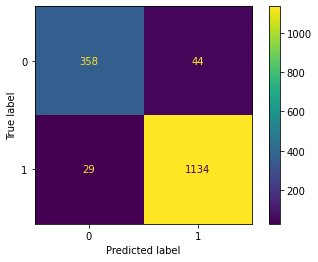

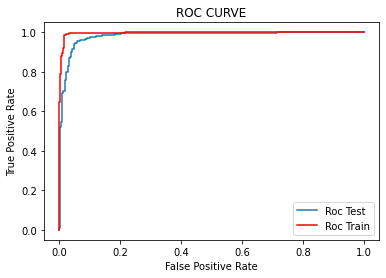

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
print (classification_report(y_test,svm_clf.predict(x_test)))
plot_confusion_matrix(svm_clf,x_test,y_test)
fig=plot_roc_curve(svm_clf,x_test,y_test,label="Roc Test")
fig=plot_roc_curve(svm_clf,x_train,y_train,color='r',label="Roc Train",ax = fig.ax_)
plt.title("ROC CURVE")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
def create_one_hot_encoding(classes, shape):
    one_hot_encoding = np.zeros(shape)
    for i in range(0, len(one_hot_encoding)):
        one_hot_encoding[i][int(classes[i])] = 1
    return one_hot_encoding

In [ ]:
def train(weights, x, y):
    h = x.dot(weights)
    h = np.maximum(h, 0, h)
    return np.linalg.pinv(h).dot(y)

In [ ]:
def soft_max(layer):
    soft_max_output_layer = np.zeros(len(layer))
    for i in range(0, len(layer)):
        numitor = 0
        for j in range(0, len(layer)):
            numitor += np.exp(layer[j] - np.max(layer))
        soft_max_output_layer[i] = np.exp(layer[i] - np.max(layer)) / numitor
    return soft_max_output_layer

def matrix_soft_max(matrix_):
    soft_max_matrix = []
    for i in range(0, len(matrix_)):
        soft_max_matrix.append(soft_max(matrix_[i]))
    return soft_max_matrix

In [ ]:
def check_network_power(o, o_real):
    count = 0
    for i in range(0, len(o)):
        count += 1 if np.argmax(o[i]) == np.argmax(o_real[i]) else 0
    return count

In [ ]:
def test(weights, beta, x, y):
    h = x.dot(weights)
    h = np.maximum(h, 0, h)  # ReLU
    o = matrix_soft_max(h.dot(beta))
    return check_network_power(o, y) / len(y)

In [ ]:
class_column = 0
test_size = 0.1
db = csv_dataset.iloc[:, :].values.astype(np.float)
np.random.shuffle(db)
y = db[:, class_column]
y -= np.min(y)
output_layer_perceptron_count = len(np.unique(y))
y = create_one_hot_encoding(y, (len(y), len(np.unique(y))))
x = np.delete(db, [class_column], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
hidden_layer_perceptron_count = len(y_test)
x = preprocessing.normalize(x)
weights = np.random.random((len(x[0]), hidden_layer_perceptron_count))
beta = train(weights, x_train, y_train)
print("Accuracy = %s." % test(weights, beta, x_test, y_test))

Accuracy = 0.9649122807017544.
